# Data Parsing

In [1]:
import xml.etree.ElementTree as ET

def iter_rows(root):
    for row in root.iterfind('.//row'):
        yield row.attrib.copy()

In [2]:
import pandas as pd

def parse_df(file_path):
    return pd.DataFrame(list(iter_rows(ET.parse(file_path).getroot())))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Tags

In [4]:
tags = parse_df('./Tags.xml')
id_columns = ['Count', 'ExcerptPostId', 'Id', 'WikiPostId']
tags[id_columns] = tags[id_columns].fillna(value=0).apply(pd.to_numeric)
tags.head()

Count  ExcerptPostId  Id           TagName  WikiPostId
0     15            105   1       definitions         104
1   1331           4909   2  machine-learning        4908
2    224             66   3           bigdata          65
3    396             80   5       data-mining          79
4     38           8960   6         databases        8959

## Votes

In [5]:
votes = parse_df('./Votes.xml')
votes.head()

BountyAmount             CreationDate Id PostId UserId VoteTypeId
0          NaN  2014-05-13T00:00:00.000  1      1    NaN          2
1          NaN  2014-05-13T00:00:00.000  2      1    NaN          2
2          NaN  2014-05-13T00:00:00.000  3      3    NaN          2
3          NaN  2014-05-13T00:00:00.000  5      3    NaN          2
4          NaN  2014-05-13T00:00:00.000  6      1    NaN          2

## Users

In [6]:
users = parse_df('./Users.xml')
users.head()

AboutMe AccountId  Age  \
0  <p>Hi, I'm not really a person.</p>\n\n<p>I'm ...        -1  NaN   
1  \n\n<p>Developer at Stack Overflow. Canadian w...     37099   33   
2  <p>Developer on the Stack Overflow team.  Find...         2   39   
3  <p>I'm a student interested in technology.</p>...   3046327  NaN   
4  <p><a href="http://blog.stackoverflow.com/2013...      2365   36   

              CreationDate   DisplayName DownVotes  Id  \
0  2014-05-13T21:29:22.820     Community       306  -1   
1  2014-05-13T22:58:54.810     Adam Lear         0   1   
2  2014-05-13T22:59:19.787  Geoff Dalgas         0   2   
3  2014-05-13T23:15:34.483    hichris123         3   3   
4  2014-05-13T23:16:09.937   Ben Collins         0   4   

            LastAccessDate            Location  \
0  2014-05-13T21:29:22.820  on the server farm   
1  2016-09-23T19:54:43.803        New York, NY   
2  2016-07-10T21:11:53.633       Corvallis, OR   
3  2016-11-18T02:24:26.463                 NaN   
4  2014-08-04T15:25:54.810   Republic of Texas   

                                 ProfileImageUrl Reputation UpVotes Views  \
0                                            NaN          1     752     0   
1  https://i.stack.imgur.com/ZJCbe.jpg?s=128&g=1        101       0    29   
2                                            NaN        101       0     2   
3            https://i.stack.imgur.com/JVj4n.png        101       1     2   
4                                            NaN        101       0     3   

                       WebsiteUrl  
0  http://meta.stackexchange.com/  
1                             NaN  
2        http://stackoverflow.com  
3                             NaN  
4      http://benjamincollins.com

## Posts

In [7]:
posts = parse_df('./Posts.xml')
print(posts.columns)

Index(['AcceptedAnswerId', 'AnswerCount', 'Body', 'ClosedDate', 'CommentCount',
       'CommunityOwnedDate', 'CreationDate', 'FavoriteCount', 'Id',
       'LastActivityDate', 'LastEditDate', 'LastEditorDisplayName',
       'LastEditorUserId', 'OwnerDisplayName', 'OwnerUserId', 'ParentId',
       'PostTypeId', 'Score', 'Tags', 'Title', 'ViewCount'],
      dtype='object')


## PostLinks

In [8]:
post_links = parse_df('./PostLinks.xml')
post_links.head()

CreationDate   Id LinkTypeId PostId RelatedPostId
0  2014-05-14T07:56:34.437    9          1     14             1
1  2014-05-15T01:46:28.467   50          1     75            71
2  2014-05-20T17:42:19.287  172          1     59            41
3  2014-06-13T16:44:29.323  387          1    361            61
4  2014-06-13T16:58:23.247  392          1     61           361

## PostHistory

In [9]:
post_history = parse_df('./PostHistory.xml')
id_columns = ['Id', 'PostHistoryTypeId', 'PostId', 'UserId']
post_history[id_columns] = post_history[id_columns].fillna(value=0).apply(pd.to_numeric)
post_history.head()


Comment             CreationDate  Id  PostHistoryTypeId  PostId  \
0     NaN  2014-05-13T23:58:30.457   7                  2       5   
1     NaN  2014-05-13T23:58:30.457   8                  1       5   
2     NaN  2014-05-13T23:58:30.457   9                  3       5   
3     NaN  2014-05-14T00:11:06.457  12                  2       7   
4     NaN  2014-05-14T00:11:06.457  13                  1       7   

                           RevisionGUID  \
0  009bca93-fce2-44ed-a277-a8452650a627   
1  009bca93-fce2-44ed-a277-a8452650a627   
2  009bca93-fce2-44ed-a277-a8452650a627   
3  ea5a5642-ed30-43ea-9be5-8e8de0e1c660   
4  ea5a5642-ed30-43ea-9be5-8e8de0e1c660   

                                                Text UserDisplayName  UserId  
0  I've always been interested in machine learnin...             NaN       5  
1  How can I do simple machine learning without h...             NaN       5  
2                                 <machine-learning>             NaN       5  
3  As a researcher and instructor, I'm looking fo...             NaN      36  
4  What open-source books (or other materials) pr...             NaN      36

## Comments

In [10]:
comments = parse_df('./Comments.xml')
comments.head()

CreationDate  Id PostId Score  \
0  2014-05-14T00:23:15.437   5      5     9   
1  2014-05-14T00:38:19.510   6      7     4   
2  2014-05-14T01:16:12.623   9      7     3   
3  2014-05-14T02:00:22.797  12     15     3   
4  2014-05-14T02:16:20.503  13     10     2   

                                                Text UserDisplayName UserId  
0  this is a super theoretical AI question. An in...             NaN     34  
1  List questions are usually not suited for Stac...             NaN     51  
2  This question appears to be off-topic because ...             NaN     66  
3  This question is far too broad. It may be salv...             NaN     51  
4  Nice one, @Nicholas... Another book from Hasti...             NaN     24

## Badges

In [11]:
badges = parse_df('./Badges.xml')
badges.head()

Class                     Date Id            Name TagBased UserId
0     3  2014-05-13T23:06:44.683  1        Informed    False      1
1     3  2014-05-13T23:11:04.153  2  Autobiographer    False      2
2     3  2014-05-13T23:20:53.547  3  Autobiographer    False      4
3     3  2014-05-13T23:20:53.547  4  Autobiographer    False      5
4     3  2014-05-13T23:20:53.547  5  Autobiographer    False      8

# Data analysis

## Most popular tags

In [12]:
print('There are {} tags.'.format(len(tags)))
print('The most popular tags are:')
tags.sort_values('Count', axis=0,ascending=False).iloc[:10]

There are 300 tags.
The most popular tags are:


Count  ExcerptPostId   Id              TagName  WikiPostId
1     1331           4909    2     machine-learning        4908
32     537           5523   46               python        5522
18     460             49   24                    r          48
53     435           4911   77       classification        4910
56     425           8885   81        neuralnetwork        8884
3      396             80    5          data-mining          79
11     269            145   15           clustering         144
101    253           8902  168  predictive-modeling        8901
42     226           8889   61              dataset        8888
2      224             66    3              bigdata          65

## Posts

In [13]:
print('There are {} posts.'.format(len(posts)))
print('There are {} questions.'.format(len(posts[posts['PostTypeId'] == '1'])))
print('There are {} answers.'.format(len(posts[posts['PostTypeId'] == '2'])))

There are 9879 posts.
There are 4228 questions.
There are 5433 answers.


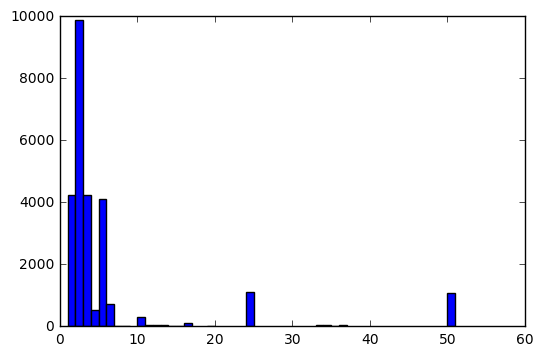

In [26]:
history_types_count = post_history.groupby(['PostHistoryTypeId']).size().sort_index()
fig, ax = plt.subplots()
rects1 = ax.bar(history_types_count.index, history_types_count.values, 1, color='b')

### Posts words analysis

Let's create a corpus of posts.

In [15]:
import nltk

In [16]:
from bs4 import BeautifulSoup

def tokenize(body):
    # TODO consider removing markdown
    raw_text = BeautifulSoup(body, 'lxml').get_text()
    return nltk.word_tokenize(raw_text.lower())

In [17]:
posts['tokenized_body'] = posts.apply(lambda row: tokenize(row['Body']), axis=1)

I iterate over all posts, removing HTML tags, stop words and punctuation. I also apply a stemmer and a build a list of all stems in the dataset.

In [18]:
noise = [
    '``',
    '\'\'',
    '--',
    '-+',
    '+=',
    '...'
]

In [19]:
import string
import itertools
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
porter = nltk.PorterStemmer()

all_tokens = list(itertools.chain.from_iterable(posts['tokenized_body']))
print('There are {} tokens.'.format(len(all_tokens)))
normalized_tokens = [t for t in all_tokens
                     if t not in string.punctuation and t not in english_stopwords and not t.isdigit() and t not in noise]
print('There are {} tokens after normalization.'.format(len(normalized_tokens)))
all_stems = [porter.stem(t) for t in normalized_tokens]

There are 1703609 tokens.
There are 761167 tokens after normalization.


I build a frequency distribution of all stems and write it to a text file (sorted by frequency).

In [20]:
fdist = nltk.FreqDist(all_stems)

In [21]:
stems_sorted_by_freq = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
with open("words.txt", "w") as text_file:
    for w, f in stems_sorted_by_freq:
        print('{} - {}'.format(w, f), file=text_file)    

With NLTK's Text, one can play with concordance.

In [22]:
nltk_text_obj = nltk.Text(normalized_tokens)
nltk_text_obj.concordance('julia')

Displaying 25 of 45 matches:
 use huge issue comes languages like julia fortran simply n't offer full functi
ell several mention languages like r julia designed explicitly scientific compu
uted system somewhere languages like julia really shine community language 're 
ph structures haskell notorious pain julia filled lot code architectures pains 
.coursera.org/course/ml anyone using julia http //julialang.org/ professional j
pure conjectures consider least week julia con first julia conference could sea
 consider least week julia con first julia conference could search github and/o
ould search github and/or registered julia modules huge dataset relational data
housands new columns personally used julia good number professional projects di
oned purely conjecture give insights julia really stands question whether reaso
uestion whether reasons prove enough julia succeed language anyone 's guess dis
 anyone 's guess distributed systems julia easiest language 've ever dealt term
 ease decid

Let's look for the most common bigrams and trigrams using NLTK's collocations:

In [23]:
bigram_fd = nltk.FreqDist(nltk.bigrams(normalized_tokens))
bigram_fd.most_common(50)

[(('machine', 'learning'), 1149),
 (('data', 'science'), 845),
 (('data', 'set'), 794),
 (('would', 'like'), 576),
 (('neural', 'network'), 538),
 (('training', 'data'), 485),
 (('neural', 'networks'), 481),
 (('time', 'series'), 424),
 (('ca', "n't"), 387),
 (('training', 'set'), 374),
 (('big', 'data'), 373),
 (('let', "'s"), 359),
 (('logistic', 'regression'), 352),
 (('something', 'like'), 334),
 (("n't", 'know'), 314),
 (('random', 'forest'), 280),
 (('linear', 'regression'), 275),
 (('decision', 'tree'), 253),
 (('looks', 'like'), 246),
 (('deep', 'learning'), 243),
 (("'m", 'trying'), 232),
 (('wo', "n't"), 227),
 (('data', 'scientist'), 226),
 (('b', 'c'), 226),
 (('test', 'set'), 219),
 (('data', 'sets'), 212),
 (('hope', 'helps'), 207),
 (('data', 'analysis'), 203),
 (('1.0', '1.0'), 201),
 (('data', 'points'), 200),
 (("'d", 'like'), 197),
 (('decision', 'trees'), 195),
 (("'m", 'sure'), 193),
 (('feature', 'selection'), 190),
 (('could', 'use'), 189),
 (('cross', 'validatio

In [24]:
bigram_fd = nltk.FreqDist(nltk.trigrams(normalized_tokens))
bigram_fd.most_common(50)

[(('1.0', '1.0', '1.0'), 178),
 (('let', "'s", 'say'), 148),
 (('nan', 'nan', 'nan'), 145),
 (('na', 'na', 'na'), 135),
 (('0.0', '0.0', '0.0'), 104),
 (('import', 'numpy', 'np'), 92),
 (('iwc', 'iwc', 'iwc'), 91),
 (('epoch', 'cost', '258872.77507019'), 86),
 (('258872.77507019', 'epoch', 'cost'), 85),
 (('cost', '258872.77507019', 'epoch'), 85),
 (('machine', 'learning', 'algorithms'), 82),
 (('would', 'like', 'know'), 71),
 (('machine', 'learning', 'algorithm'), 59),
 (('natural', 'language', 'processing'), 51),
 (('time', 'series', 'data'), 50),
 (('training', 'data', 'set'), 50),
 (('import', 'pandas', 'pd'), 49),
 (('straight', 'straight', 'good'), 48),
 (('support', 'vector', 'machines'), 47),
 (('united', 'states', 'america'), 45),
 (('stochastic', 'gradient', 'descent'), 43),
 (('please', 'let', 'know'), 43),
 (('recurrent', 'neural', 'networks'), 41),
 (('import', 'matplotlib.pyplot', 'plt'), 41),
 (('convolutional', 'neural', 'networks'), 39),
 (('ca', "n't", 'find'), 38),
 

Trigram `(('epoch', 'cost', '258872.77507019'), 86)` looks strange. What's going on?

In [25]:
nltk_text_obj.concordance('258872.77507019')

Displaying 25 of 86 matches:
cost 969572.73014003 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 2003326.79850769 epo
ost 2003326.79850769 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 2003326.79850769 epo
ost 2003326.79850769 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872.77507019 epoch cost 258872.77507019 epoch cost 258872.77507019 epoc
cost 258872

It's copied & pasted log output. This suggests that data require some more cleaning.